In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Circle
from lifelines import KaplanMeierFitter

In [3]:
os.chdir('./T-Matsuura_LDLT')
path = os.getcwd()

In [ ]:
train_X_180 = pd.read_csv(path+'/Data/train_X_180_revise.csv',index_col=0)
train_y_180 = pd.read_csv(path+'/Data/train_y_180_revise.csv',index_col=0)
val_X_180 = pd.read_csv(path+'/Data/val_X_180_revise.csv',index_col=0)
val_Y_180 = pd.read_csv(path+'/Data/val_Y_180_revise.csv',index_col=0)
clustlabel = pd.read_csv(path+'/Data/ClustLabel_revsie.csv',index_col = 0)

In [9]:
X_180 = train_X_180.drop(['Rp_neutro','Rp_lymph','Portal_vein_blood_flow','SLV','Rp_HBsAb_No','graft2_Right lobe and above','graft2_Posterior area','BD stenosis_Yes','Rp_preportal_vein_thrombosis_complete','Rp_preportal_vein_thrombosis_partial','Rp_preportal_vein_thrombosis_No','ALF_Yes','BD stenosis_No','Bile leak_No','Simulect_No','introductory_MMF_No','Biliary stent_No','Bypass_No','shunt_0','Rp_preoperative_esophageal_varices_(post-EIS_also_referred_to_as_EIS)_No','Liver_resection_transplant_history_No','History_of _pper_abdominal_laparotomy_No','Rp_splenectomy1_0','preCKD_No','Rp_preascite_0','preDM_No','portal_vein_thrombosis2_No','graft2_Left lobe','donor_sex_F','bloodrelation_No','HCVAB_No','donor_HTLV1_No','HTLV1_No','donor_HBcAb_No','Rp_sex_F','HCC_No','ALF_No'],axis = 1).reset_index(drop=True)#相関の高い因子の除去
X_180_val = val_X_180.drop(['Rp_neutro','Rp_lymph','Portal_vein_blood_flow','SLV','Rp_HBsAb_No','graft2_Right lobe and above','graft2_Posterior area','BD stenosis_Yes','Rp_preportal_vein_thrombosis_complete','Rp_preportal_vein_thrombosis_partial','Rp_preportal_vein_thrombosis_No','ALF_Yes','BD stenosis_No','Bile leak_No','Simulect_No','introductory_MMF_No','Biliary stent_No','Bypass_No','shunt_0','Rp_preoperative_esophageal_varices_(post-EIS_also_referred_to_as_EIS)_No','Liver_resection_transplant_history_No','History_of _pper_abdominal_laparotomy_No','Rp_splenectomy1_0','preCKD_No','Rp_preascite_0','preDM_No','portal_vein_thrombosis2_No','graft2_Left lobe','donor_sex_F','bloodrelation_No','HCVAB_No','donor_HTLV1_No','HTLV1_No','donor_HBcAb_No','Rp_sex_F','HCC_No','ALF_No'],axis = 1).reset_index(drop=True)#相関の高い因子の除去
y_clustlabel = pd.concat([train_y_180,clustlabel],axis =  1).reset_index(drop=True)


In [ ]:
#G3~G5は今回まとめて解析を行うため新たな列を定義
g = []
y_clustlabel['ClustLabel'] = y_clustlabel['ClustLabel'].replace({0:'G5',1:'G1',2:'G4',3:'G3',4:'G2'})
for k in range(len(y_clustlabel)):
    xc = y_clustlabel.loc[k,'ClustLabel']
    if xc =='G1':
        g.append(0)
        
          
    elif xc== 'G2':
        g.append(1)
        
        
    else:
        g.append(2)
        
       
y_clustlabel['G1~G3~G5'] = g


In [13]:
#パラメータチューニング
from sklearn.metrics import make_scorer, roc_auc_score, recall_score,accuracy_score
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
#モデル定義
classifier = RandomForestClassifier(random_state = 4,class_weight='balanced')
factor = pd.factorize(y_clustlabel['G1~G3~G5'])
#SMOTEを使用
smote = SMOTE(sampling_strategy='auto', random_state=42)# SMOTEを適用
X_resampled, y_resampled = smote.fit_resample(X_180,factor[0])
scoring = make_scorer(accuracy_score)
#パラメータ定義
param_grid = {
    'n_estimators': [10,50,100, 500,1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    
}

# グリッドサーチを実行
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring = scoring ,cv=5,verbose=2)
grid_search.fit(X_resampled, y_resampled)

print("Best parameters found with Accuracy: ", grid_search.best_params_)
print("Best Accuracy score found : ", grid_search.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_sample

In [14]:

classifier = RandomForestClassifier(n_estimators = 500,random_state=4,class_weight='balanced',max_depth = None,min_samples_split = 2)
factor = pd.factorize(y_clustlabel['G1~G3~G5'])
smote = SMOTE( random_state=42)# SMOTEを適用
X_resampled, y_resampled = smote.fit_resample(X_180,factor[0])

classifier.fit(X_resampled, y_resampled)
classifier.predict(X_180_val)
predictions_multi = classifier.predict_proba(X_180_val)

predictions_multi_predict = classifier.predict(X_180_val)


print("Predictions for unlabeled data:", predictions_multi)

print("Predictions for unlabeled data:", predictions_multi_predict)

Predictions for unlabeled data: [[0.894 0.06  0.046]
 [0.712 0.148 0.14 ]
 [0.822 0.116 0.062]
 [0.9   0.068 0.032]
 [0.916 0.054 0.03 ]
 [0.226 0.41  0.364]
 [0.73  0.186 0.084]
 [0.984 0.014 0.002]
 [0.92  0.042 0.038]
 [0.128 0.598 0.274]
 [0.774 0.154 0.072]
 [0.984 0.016 0.   ]
 [0.952 0.044 0.004]
 [0.884 0.07  0.046]
 [0.902 0.088 0.01 ]
 [0.916 0.074 0.01 ]
 [0.712 0.224 0.064]
 [0.888 0.064 0.048]
 [0.766 0.17  0.064]
 [0.848 0.12  0.032]
 [0.982 0.018 0.   ]
 [0.726 0.224 0.05 ]
 [0.902 0.076 0.022]
 [0.906 0.064 0.03 ]
 [0.774 0.17  0.056]
 [0.612 0.256 0.132]
 [0.914 0.062 0.024]
 [0.74  0.152 0.108]
 [0.748 0.194 0.058]
 [0.328 0.3   0.372]
 [0.858 0.09  0.052]
 [0.944 0.042 0.014]
 [0.724 0.224 0.052]
 [0.952 0.04  0.008]
 [0.858 0.088 0.054]
 [0.8   0.14  0.06 ]
 [0.872 0.096 0.032]
 [0.748 0.184 0.068]
 [0.846 0.11  0.044]
 [0.11  0.412 0.478]
 [0.946 0.046 0.008]
 [0.892 0.08  0.028]
 [0.196 0.536 0.268]
 [0.6   0.232 0.168]
 [0.188 0.518 0.294]
 [0.77  0.204 0.026]
 [

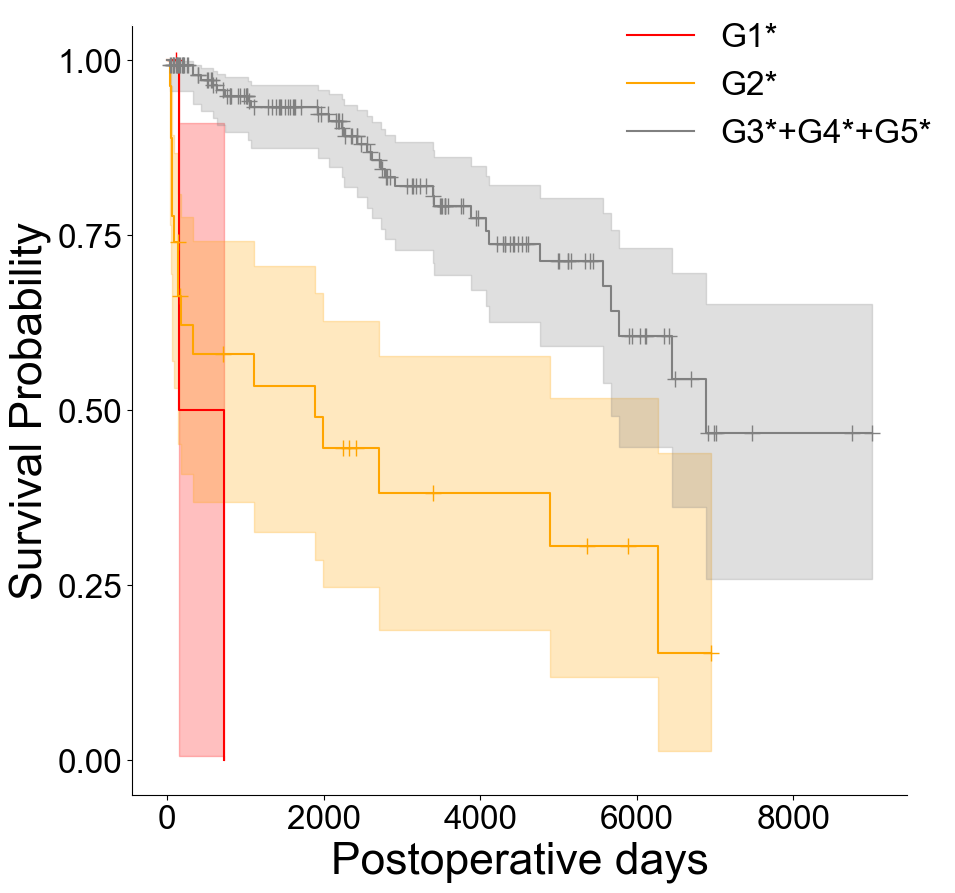

In [ ]:
val_Y_180['multi'] = predictions_multi_predict
a = val_Y_180['days_alive']
b = val_Y_180['graftloss']
c_2 = val_Y_180['multi']
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('white')

kmf_1=KaplanMeierFitter()
kmf_2 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()



kmf_1.fit(a[c_2==2],b[c_2==2],label = 'Early-loss*')
kmf_2.fit(a[c_2==1],b[c_2==1],label = 'Intermediate-loss*')
kmf_3.fit(a[c_2==0],b[c_2==0],label = 'Long/No-loss*')




kmf_1.plot_survival_function(show_censors = True,color='orange')
kmf_2.plot_survival_function(show_censors = True,color='purple')
kmf_3.plot_survival_function(show_censors = True,color = 'grey')



plt.yticks([0.0,0.25,0.5,0.75,1.0],fontsize=24,weight='normal')
plt.xticks(fontsize=24,weight='normal')
plt.legend(bbox_to_anchor=(0.6, 0.8),prop={ "weight":"normal",'size':24},facecolor='white',frameon=False)
plt.xlabel('Postoperative days',weight='normal',size = 32)
plt.ylabel('Survival Probability',weight='normal',size = 32)
ax.spines['top'].set_color('white')  # X軸
ax.spines['right'].set_color('white')
plt.rcParams['font.family'] = 'Arial'
plt.savefig(path+'/Output/Fig3/Fig3B_revise.png',bbox_inches='tight')
plt.show()



# Fig3C

In [39]:
#G3~G5は今回まとめて解析を行うため新たな列を定義
g = []

for k in range(len(y_clustlabel)):
    xc = y_clustlabel.loc[k,'ClustLabel']
    if xc =='G1':
        g.append(1)     
    else:
        g.append(0)
        
       
y_clustlabel['G1ornot'] = g


In [40]:
#G3~G5は今回まとめて解析を行うため新たな列を定義
g = []

for k in range(len(y_clustlabel)):
    xc = y_clustlabel.loc[k,'ClustLabel']
    if xc =='G2':
        g.append(1)     
    else:
        g.append(0)
        
       
y_clustlabel['G2ornot'] = g


In [41]:
#G3~G5は今回まとめて解析を行うため新たな列を定義
g = []

for k in range(len(y_clustlabel)):
    xc = y_clustlabel.loc[k,'ClustLabel']
    if xc =='G3' or xc=='G4' or xc == 'G5':
        g.append(1)     
    else:
        g.append(0)
        
       
y_clustlabel['G3ornot'] = g


In [42]:
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import auc, roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
def cluster_predicition_score_each(x,y,objective_l):  
    
    predicted_data = pd.DataFrame()  
    cv = StratifiedKFold(n_splits=5)
    
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_l = []
    recall_l = []
    precision_l = []
    F1score_l = []
    accuracy_l2 = []
    recall_l2 = []
    precision_l2 = []
    F1score_l2 = []
    accuracy_l3 = []
    recall_l3 = []
    precision_l3 = []
    F1score_l3 = []
    best_threshold_1_l = []
    best_threshold2_l = []
    for i, (train, test) in enumerate(cv.split(x, y[objective_l[0]])):
        x_train = x.iloc[train,:].copy()
        x_test = x.iloc[test,:].copy()
        y_train = y.iloc[train,:].copy()
        y_test = y.iloc[test,:].copy()
        classifier = RandomForestClassifier(random_state = 4,class_weight='balanced',max_depth = None, min_samples_split =  2, n_estimators = 500)
        smote = SMOTE(sampling_strategy='auto', random_state=42)# SMOTEを適用
        X_resampled, y_resampled = smote.fit_resample(x_train, y_train[objective_l[0]])
        
        
        model = classifier.fit(X_resampled, y_resampled)
        #probability
        probs = model.predict_proba(x_test)[:,1]
        # ROC
        fpr, tpr, threshold_list = roc_curve(y_test[objective_l[0]], probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        auc_ = auc(fpr, tpr)
        
        # threshold
        best_threshold_idx = np.argmax((tpr - fpr)[1:]) + 1
        #best_threshold_1 = threshold_list[best_threshold_idx]        
        #best_threshold_1_l.append(best_threshold_1)
        
        best_threshold_1,best_fbeta = find_best_threshold_for_recall(y_test[objective_l[0]], probs)
        best_threshold_1_l.append(best_threshold_1)
        #G1 or not
        thres_predict = (probs >= best_threshold_1).astype(int)
        x_test['cluster_predict'] = thres_predict
        y_test['cluster_predict'] = thres_predict
        accuracy = accuracy_score(list(y_test[objective_l[0]]), list(y_test['cluster_predict']))
        accuracy_l.append(accuracy)
        # Recall
        recall = recall_score(list(y_test[objective_l[0]]), list(y_test['cluster_predict']))
        recall_l.append(recall)
        # Precision
        precision = precision_score(list(y_test[objective_l[0]]), list(y_test['cluster_predict']))
        precision_l.append(precision)
        # F1 Score
        f1 = f1_score(list(y_test[objective_l[0]]), list(y_test['cluster_predict']))
        F1score_l.append(f1)
        f1_mean = np.mean(F1score_l)
        f1_std = np.std(F1score_l)
        
        G1 = y_test[y_test['cluster_predict']==1]
        G1_ = y_test[y_test[objective_l[0]]==1]
    
        print('G1予測割合')
        print(G1[objective_l[0]][G1[objective_l[0]]==1].count()/G1['cluster_predict'].count())
        print('Actually G1/ Predict G1')
        print(G1_['cluster_predict'][G1_['cluster_predict']==1].count()/G1_['cluster_predict'].count())
        
        x_train = pd.concat([x_train,y_train[objective_l[0]]],axis=1)
        x_train_noG1 = x_train[x_train[objective_l[0]] != 1].drop(objective_l[0], axis = 1).copy()
        y_train_noG1 = y_train[y_train[objective_l[0]] != 1].copy()
        x_train = x_train.drop('G1ornot',axis=1)
        x_test_noG1 = x_test[x_test['cluster_predict'] != 1].drop('cluster_predict', axis = 1).copy()
        y_test_noG1 = y_test[y_test['cluster_predict'] != 1].copy()
        
        classifier = RandomForestClassifier(random_state = 4,class_weight='balanced',max_depth = None, min_samples_split =  2, n_estimators = 500)
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(x_train, y_train[objective_l[1]])
        model = classifier.fit(X_resampled, y_resampled)
        probs = model.predict_proba(x_test_noG1)[:,1]
        # ROC
        fpr, tpr, threshold_list = roc_curve(y_test_noG1[objective_l[1]], probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        auc_ = auc(fpr, tpr)
        youden_index= tpr-fpr
        # threshold
        #best_threshold_idx = np.argmax(youden_index[1:])+1
        #best_threshold2 = threshold_list[best_threshold_idx]
        #best_threshold2_l.append(best_threshold2)
        
        best_threshold_2,best_fbeta2 = find_best_threshold_for_recall2(y_test_noG1[objective_l[1]], probs)
        best_threshold2_l.append(best_threshold_2)
        #G1 or not
        thres_predict = (probs >= best_threshold_2).astype(int)
        y_test_noG1['cluster_predict'] = thres_predict
        #score
        accuracy = accuracy_score(list(y_test_noG1[objective_l[1]]), list(y_test_noG1['cluster_predict']))
        accuracy_l2.append(accuracy)
        # Recall
        recall = recall_score(list(y_test_noG1[objective_l[1]]), list(y_test_noG1['cluster_predict']))
        recall_l2.append(recall)
        # Precision
        precision = precision_score(list(y_test_noG1[objective_l[1]]), list(y_test_noG1['cluster_predict']))
        precision_l2.append(precision)
        # F1 Score
        f1 = f1_score(list(y_test_noG1[objective_l[1]]), list(y_test_noG1['cluster_predict']))
        F1score_l2.append(f1)
       
        y_test_noG1['cluster_predict'] = y_test_noG1['cluster_predict'].replace({0:2,1:3})
        y_predicted = pd.concat([y_test[y_test['cluster_predict'] == 1],y_test_noG1])
        predicted_data = pd.concat([predicted_data,y_predicted])
        thres_predict_2 = (probs < best_threshold_2).astype(int)
        y_test_noG1['G2_predict'] = thres_predict_2
        
        #score
        accuracy2 = accuracy_score(list(y_test_noG1[objective_l[2]]), list(y_test_noG1['G2_predict']))
        accuracy_l3.append(accuracy2)
        # Recall
        recall2 = recall_score(list(y_test_noG1[objective_l[2]]), list(y_test_noG1['G2_predict']))
        recall_l3.append(recall2)
        # Precision
        precision2 = precision_score(list(y_test_noG1[objective_l[2]]), list(y_test_noG1['G2_predict']))
        precision_l3.append(precision2)
        # F1 Score
        f12 = f1_score(list(y_test_noG1[objective_l[2]]), list(y_test_noG1['G2_predict']))
        F1score_l3.append(f12)
        G3 = y_test_noG1[y_test_noG1['cluster_predict']==3]
        G3_ = y_test_noG1[y_test_noG1[objective_l[1]]==1]
        G2 = y_test_noG1[y_test_noG1['cluster_predict']==2]
        G2_ = y_test_noG1[y_test_noG1[objective_l[2]]==1]
        print('G2 predict ratio')
        print(G2[objective_l[2]][G2[objective_l[2]]==1].count()/G2['cluster_predict'].count())
        print('Actually G2/ Predict G2')
        print(G2_['cluster_predict'][G2_['cluster_predict']==2].count()/G2_['cluster_predict'].count())
        
        print('G3予測割合')
        print(G3[objective_l[1]][G3[objective_l[1]]==1].count()/G3['cluster_predict'].count())
        print('Actually G3/ Predict G3')
        print(G3_['cluster_predict'][G3_['cluster_predict']==3].count()/G3_['cluster_predict'].count())
        
        
        
    accuracy_mean = np.mean(accuracy_l)
    accuracy_std = np.std(accuracy_l)
    # Recall
    recall_mean = np.mean(recall_l)
    recall_std = np.std(recall_l)
    # Precision
    precision_mean = np.mean(precision_l)
    precision_std = np.std(precision_l)
    # F1 Score
    f1_mean = np.mean(F1score_l)
    f1_std = np.std(F1score_l)
    print(objective_l[0]+'predicition')
    print("accuracy (mean ± std): {:.2f} ± {:.2f}".format(accuracy_mean, accuracy_std))
    print("recall (mean ± std): {:.2f} ± {:.2f}".format(recall_mean, recall_std))
    print("precision (mean ± std): {:.2f} ± {:.2f}".format(precision_mean, accuracy_std))
    print("F1score (mean ± std): {:.2f} ± {:.2f}".format(f1_mean, f1_std))
    
    accuracy_mean2 = np.mean(accuracy_l2)
    accuracy_std2 = np.std(accuracy_l2)
    # Recall
    recall_mean2 = np.mean(recall_l2)
    recall_std2 = np.std(recall_l2)
    # Precision
    precision_mean2 = np.mean(precision_l2)
    precision_std2 = np.std(precision_l2)
    # F1 Score
    f1_mean2 = np.mean(F1score_l2)
    f1_std2 = np.std(F1score_l2)
    print(objective_l[1]+'予測')
    print("accuracy (mean ± std): {:.2f} ± {:.2f}".format(accuracy_mean2, accuracy_std2))
    print("recall (mean ± std): {:.2f} ± {:.2f}".format(recall_mean2, recall_std2))
    print("precision (mean ± std): {:.2f} ± {:.2f}".format(precision_mean2, accuracy_std2))
    print("F1score (mean ± std): {:.2f} ± {:.2f}".format(f1_mean2, f1_std2))
    
    accuracy_mean3 = np.mean(accuracy_l3)
    accuracy_std3 = np.std(accuracy_l3)
    # Recall
    recall_mean3 = np.mean(recall_l3)
    recall_std3 = np.std(recall_l3)
    # Precision
    precision_mean3 = np.mean(precision_l3)
    precision_std3 = np.std(precision_l3)
    # F1 Score
    f1_mean3 = np.mean(F1score_l3)
    f1_std3 = np.std(F1score_l3)
    print(objective_l[2]+'prediciton')
    print("accuracy (mean ± std): {:.2f} ± {:.2f}".format(accuracy_mean3, accuracy_std3))
    print("recall (mean ± std): {:.2f} ± {:.2f}".format(recall_mean3, recall_std3))
    print("precision (mean ± std): {:.2f} ± {:.2f}".format(precision_mean3, accuracy_std3))
    print("F1score (mean ± std): {:.2f} ± {:.2f}".format(f1_mean3, f1_std3))
    best_threshold2 = np.mean(best_threshold2_l)
    best_threshold_1 = np.mean(best_threshold_1_l)
    
    combined_list_accuracy = accuracy_l + accuracy_l2 + accuracy_l3
    combined_list_recall = recall_l + recall_l2 + recall_l3
    combined_list_precision = precision_l + precision_l2 + precision_l3
    combined_list_f1 = F1score_l + F1score_l2 + F1score_l3
    
    accuracy_mean_avg = np.mean(combined_list_accuracy)
    accuracy_std_avg = np.std(combined_list_accuracy)
    recall_mean_avg = np.mean(combined_list_recall)
    recall_std_avg = np.std(combined_list_recall)
    precision_mean_avg = np.mean(combined_list_precision)
    precision_std_avg = np.std(combined_list_precision)
    f1_mean_avg = np.mean(combined_list_f1)
    f1_std_avg = np.std(combined_list_f1)
    print('Macro 平均')
    print("accuracy (mean ± std): {:.2f} ± {:.2f}".format(accuracy_mean_avg, accuracy_std_avg))
    print("recall (mean ± std): {:.2f} ± {:.2f}".format(recall_mean_avg, recall_std_avg))
    print("precision (mean ± std): {:.2f} ± {:.2f}".format(precision_mean_avg, accuracy_std_avg))
    print("F1score (mean ± std): {:.2f} ± {:.2f}".format(f1_mean_avg, f1_std_avg))
        
    return predicted_data, best_threshold_1,best_threshold2
        
     
        
            
    
    
    
    
    
    #plt.savefig(path+'ROC/ROC_predictcluster3_no30_traindata_donor_final_smote'+a+'.pdf',bbox_inches='tight')
   
    
    
    # plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer, roc_auc_score, recall_score
from sklearn.metrics import fbeta_score


# y_true: 正解ラベル（0 or 1）
# y_prob: モデルの予測確率（クラス1の確率）

def find_best_threshold_for_recall(y_true, y_prob):
    thresholds = np.linspace(0.01, 0.99, 99)
    best_fbeta = 0
    best_threshold = 0.5

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        #p = recall_score(y_true, y_pred, zero_division=0)
        # y_true: 正解ラベル, y_pred: モデルの予測ラベル
        p = fbeta_score(y_true, y_pred, beta=1)
        if p > best_fbeta:
            best_fbeta = p
            best_threshold = t

    return best_threshold, best_fbeta

def find_best_threshold_for_recall2(y_true, y_prob):
    thresholds = np.linspace(0.01, 0.99, 99)
    best_fbeta = 0
    best_threshold = 0.5

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        #p = recall_score(y_true, y_pred, zero_division=0)
        # y_true: 正解ラベル, y_pred: モデルの予測ラベル
        p = fbeta_score(y_true, y_pred, beta=1)
        if p > best_fbeta:
            best_fbeta = p
            best_threshold = t

    return best_threshold, best_fbeta



In [ ]:
def cluster_predicition_val(x_train,y_train,y_train_g,x_val,y_val,y_val_g,objective_l,best_threshold_1,best_threshold2):  
    print(objective_l)
    predicted_data = pd.DataFrame()  
    
    
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_l = []
    recall_l = []
    precision_l = []
    F1score_l = []
    accuracy_l2 = []
    recall_l2 = []
    precision_l2 = []
    F1score_l2 = []

    classifier = RandomForestClassifier(random_state = 4,class_weight='balanced',max_depth = None, min_samples_split =  2, n_estimators = 500)
    smote = SMOTE(sampling_strategy='auto', random_state=42)# SMOTEを適用
    X_resampled, y_resampled = smote.fit_resample(x_train,  y_train[objective_l[0]])
    model = classifier.fit(X_resampled, y_resampled)
    #calculate probability
    probs = model.predict_proba(x_val)[:,1]
    print(probs)
    # ROC curve
    #G1 or not
    #fpr, tpr, thresholds = roc_curve(y_val[objective_l[0]], probs)
    #best_threshold_idx = np.argmax(tpr - fpr)
    #best_threshold = thresholds[best_threshold_idx]
    #print("Best threshold:", best_threshold)
    
    thres_predict = (probs > best_threshold_1).astype(int)
    x_val['cluster_predict'] = thres_predict
    y_val['cluster_predict'] = thres_predict
    print(len(thres_predict))
    
    
    x_train = pd.concat([x_train,y_train[objective_l[0]]],axis=1)
    x_train_noG1 = x_train[x_train[objective_l[0]] != 1].drop(objective_l[0], axis = 1).copy()
    y_train_noG1 = y_train[y_train[objective_l[0]] != 1].copy()
    x_train = x_train.drop('G1ornot',axis=1)
    x_val_noG1 = x_val[x_val['cluster_predict'] != 1].drop('cluster_predict', axis = 1).copy()
    y_val_noG1 = y_val[y_val['cluster_predict'] != 1].copy()
    classifier = RandomForestClassifier(random_state = 4,class_weight='balanced')
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(x_train, y_train[objective_l[1]])
    model = classifier.fit(X_resampled, y_resampled)
    probs = model.predict_proba(x_val_noG1)[:,1]
    # ROC curve
    print(probs)
    #G3~5 or not
    thres_predict = (probs > best_threshold2).astype(int)
    
    y_val_noG1['cluster_predict'] = thres_predict
    #score
    
    #Substitution to make a row
    y_val_noG1['cluster_predict'] = y_val_noG1['cluster_predict'].replace({0:2,1:3})
    
    
    y_predicted = pd.concat([y_val[y_val['cluster_predict'] == 1],y_val_noG1])
    predicted_data = pd.concat([predicted_data,y_predicted])
        
   
    
    return predicted_data
        
     
        
            
    
    


In [ ]:
#Only important factors
objective_l = ['G1ornot','G3ornot','G2ornot']
x = X_180.loc[:,['ascite_30POD_','ascite_14POD_','T_BIL_14POD_','PT_per14POD_','donor_max_TB','Rp_splenectomy1_1','precondition_Home']]
y = y_clustlabel
predicted_data,best_threshold_1,best_threshold2 = cluster_predicition_score_each(x,y,objective_l)

NameError: name 'X_180' is not defined

In [ ]:
objective_l = ['G1ornot','G3ornot','G2ornot']
x_train = X_180.loc[:,['ascite_30POD_','ascite_14POD_','T_BIL_14POD_','PT_per14POD_','donor_max_TB','Rp_splenectomy1_1','precondition_Home']]
y_train  = y_clustlabel
x_val = X_180_val.loc[:,['ascite_30POD_','ascite_14POD_','T_BIL_14POD_','PT_per14POD_','donor_max_TB','Rp_splenectomy1_1','precondition_Home']]
y_val = val_Y_180
y_train_g = train_y_180['graftloss_within_6months'].astype('bool').reset_index(drop=True)
y_val_g = val_Y_180['graftloss_within_6months'].astype('bool').reset_index(drop=True)
predicted_data = cluster_predicition_val(x_train,y_train,y_train_g,x_val,y_val,y_val_g,objective_l,best_threshold_1,best_threshold2)

In [51]:
a_2 =predicted_data['days_alive']
b_2 =predicted_data['graftloss']
b_180_2 =predicted_data['graftloss_within_6months']

c_2_2 =predicted_data['cluster_predict']


In [ ]:
#重要な因子のみで行った結果
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('white')

kmf_1 = KaplanMeierFitter()
kmf_2 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()



kmf_1.fit(a_2[c_2_2==1],b_2[c_2_2==1],label = 'Early-loss*')
kmf_2.fit(a_2[c_2_2==2],b_2[c_2_2==2],label = 'Intermediate-loss*')
kmf_3.fit(a_2[c_2_2==3],b_2[c_2_2==3],label = 'Long/No-loss*')




kmf_1.plot_survival_function(show_censors = True,color='orange')
kmf_2.plot_survival_function(show_censors = True,color='purple')
kmf_3.plot_survival_function(show_censors = True,color = 'grey')



plt.yticks([0.0,0.25,0.5,0.75,1.0],fontsize=24,weight='normal')
plt.xticks(fontsize=24,weight='normal')
plt.legend(bbox_to_anchor=(0.6, 0.98),prop={ "weight":"normal",'size':24},facecolor='white',frameon=False)
plt.xlabel('Postoperative days',weight='normal',size = 32)
plt.ylabel('Survival Probability',weight='normal',size = 32)
ax.spines['top'].set_color('white')  # X軸
ax.spines['right'].set_color('white')
plt.rcParams['font.family'] = 'Arial'

plt.savefig(path+'/Output/Fig3/Fig3C_revise.png',bbox_inches='tight')
plt.show()



# Fig3D

In [17]:
#missing value of MELDscore
val_Y_180.reset_index(drop=True)[val_Y_180.reset_index(drop=True)['preMELD'].isnull() == True].index

Int64Index([173], dtype='int64')

In [18]:
import math
score = []
val_X_180_copy = val_X_180.reset_index(drop=True).copy()
for i in range(len(val_X_180_copy)):
    if i == 173:#index173が欠損しているためMELDscoreも計算してからpredictivescoreを計算
        MELD = 9.57 * math.log(1) + 3.78 * math.log(val_X_180_copy.loc[i,"Rp_preT_Bil"]) + 11.2 * math.log(val_Y_180.reset_index(drop=True).loc[i,"prePT_INR"]) + 6.43
        predictive = 0.011*float(val_X_180_copy.loc[i," GV/SLV(%)"])-0.016*float(val_X_180_copy.loc[i,'donor_age'])-0.008*float(MELD)-0.15*float(val_X_180_copy.loc[i,'shunt_1'])+1.757
        score.append(predictive)
    else:
        predictive = 0.011*float(val_X_180_copy.loc[i," GV/SLV(%)"])-0.016*float(val_X_180_copy.loc[i,'donor_age'])-0.008*float(val_Y_180.reset_index(drop=True).loc[i,'preMELD'])-0.15*float(val_X_180_copy.loc[i,'shunt_1'])+1.757
        score.append(predictive)

val_X_180_copy['predictive_score']=score

In [19]:
#Making group of score
list_=[]
for i in val_X_180_copy['predictive_score']:
    if i >= 1.30:
        list_.append(0)
    elif i <1.15:
        list_.append(2)
    else:
        list_.append(1)
val_X_180_copy['survival_group'] = list_
cc = val_X_180_copy['survival_group']

In [20]:
aa = val_Y_180['days_alive'].reset_index(drop=True)
bb = val_Y_180['graftloss'].reset_index(drop=True)
cc = val_X_180_copy['survival_group']

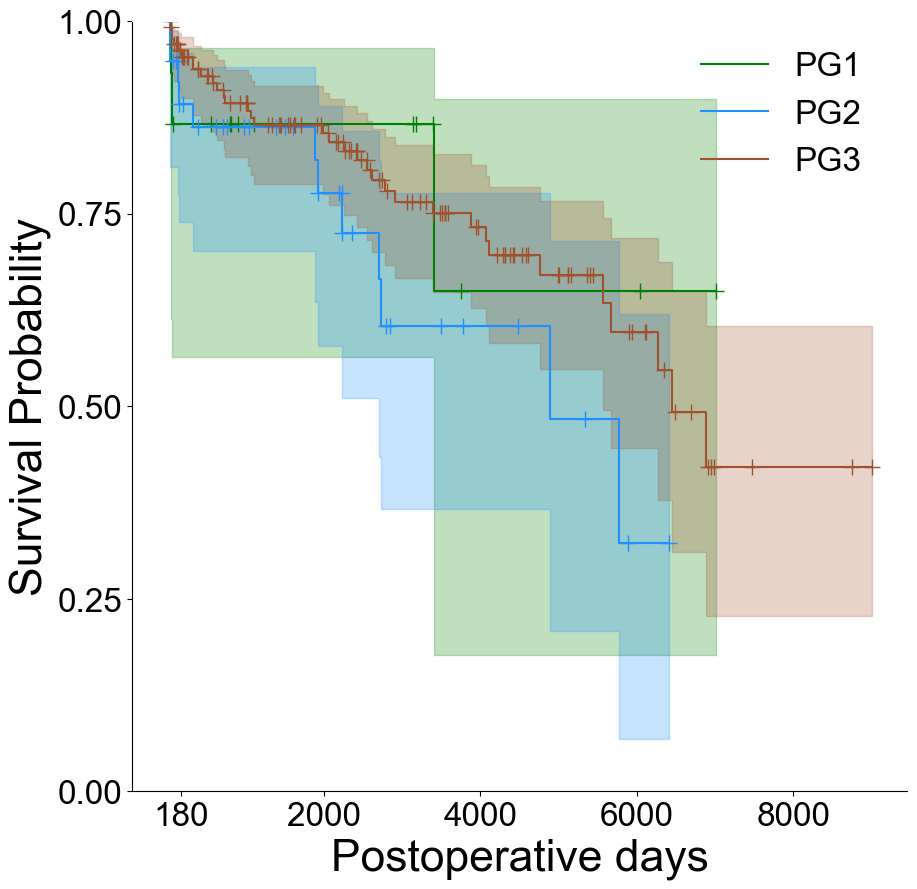

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('white')

kmf_1 = KaplanMeierFitter()
kmf_2 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()

kmf_1.fit(aa[cc==2],bb[cc==2],label = 'PG1')
kmf_2.fit(aa[cc==1],bb[cc==1],label = 'PG2')
kmf_3.fit(aa[cc==0],bb[cc==0],label = 'PG3')





kmf_1.plot_survival_function(show_censors = True,color = 'green')
kmf_2.plot_survival_function(show_censors = True, color = 'dodgerblue')
kmf_3.plot_survival_function(show_censors = True,color = 'sienna')



plt.ylim(0,1)
plt.yticks([0.0,0.25,0.5,0.75,1.0],fontsize=24,weight='normal')
plt.xticks([180,2000,4000,6000,8000],fontsize=24,weight='normal')


plt.legend(bbox_to_anchor=(0.98, 1),prop={ "weight":"normal",'size':24},facecolor='white',frameon=False)
plt.xlabel('Postoperative days',weight='normal',size = 32)
plt.ylabel('Survival Probability',weight='normal',size = 32)


ax.spines['top'].set_color('white')  # X軸
ax.spines['right'].set_color('white')
plt.rcParams['font.family'] = 'Arial'
plt.savefig(path+'/Output/Fig3/Fig3D_revise.png',bbox_inches='tight')
plt.show()


